Experimental Design: 
1. Analysis of publicly available datase
2. Pilot Project

Decision on 
- Number of replicates
- Sequencing depth
- Library type
- Read Length

Sent biological samples to sequencing facility. 
Receive back Fastq files. 


How to Make those decisions: 
Determine the number of replicates needed based on the expected variability in your samples and the effect size you wish to detect. 


In [1]:
# Load necessary libraries
library(RNASeqPower)
library(ggplot2)


Power Analysis in Your Following App:
Power analysis, particularly for RNA-seq data. Here's how it ties together:

User Inputs:

sig_lev: The significance level (α) chosen by the user.
fc: The effect size (fold change) chosen by the user.
n_samples: The number of samples chosen by the user.
depth: The sequencing depth (in millions) chosen by the user.
Reactive Power Calculation:

The app uses these inputs to calculate power using the rnapower function. This function likely uses a model to estimate the probability of detecting differential expression under various conditions.
Plotting the Power Curve:

The power curve plots the relationship between sample size and power, showing how increasing the number of samples affects the likelihood of detecting a true effect.
Example Scenario
Suppose you want to design an RNA-seq experiment to detect differentially expressed genes between two conditions. You need to decide how many samples to include in each group. Here's how you might use the app:

Set the Significance Level (α):

Choose 0.05, a common choice, meaning you are willing to accept a 5% chance of a Type I error.
Set the Effect Size (Fold Change):

Choose an effect size you consider biologically meaningful, say a fold change of 2 (indicating the gene expression level doubles).
Determine the Sample Size:

Use the slider to explore different sample sizes. The power curve will show you the power associated with each sample size.
Aim for a power of at least 0.8 (80%), a commonly accepted threshold indicating a good chance of detecting a true effect.
Adjust Sequencing Depth:

Consider the sequencing depth required for reliable detection. Higher depth can increase power by reducing variability in measurements.
By exploring these inputs, you can design an experiment with a sufficient number of samples and appropriate sequencing depth to confidently detect differentially expressed genes, ensuring the study is both efficient and effective.

Conclusion
Statistical power is a critical concept in experimental design, particularly in high-throughput sequencing studies like RNA-seq. Your Shiny app provides a user-friendly interface to perform power analysis, helping researchers make informed decisions about sample size and other experimental parameters to ensure robust and reliable results.








In [2]:
library(shiny)
library(ggplot2)
library(plotly)
library(DESeq2)

# Define UI
ui <- fluidPage(
  
  titlePanel("Power Analysis App"),
  
  sidebarLayout(
    sidebarPanel(
      selectInput("sigtab", label = "Select Analysis Type",
                  choices = c("power_curve" = "power_curve", "Other Analysis" = "other_analysis"),
                  selected = "power_curve"),
      conditionalPanel(condition = "input.sigtab == 'power_curve'",
                       numericInput("sig_lev", label = "Level of significance (alpha)", min = 0, max = 0.1, value = 0.05, step = 0.01),
                       sliderInput("fc", label = "Effect size (fold change)", min = 1, max = 5, value = 2, step = 0.1),
                       numericInput("n_samples", label = "Number of samples", min = 2, max = 50, value = 10),
                       numericInput("depth", label = "Sequencing depth (in million)", min = 2, max = 10, value = 5, step = 0.5),
                       actionButton("gen_pow_btn", "Draw power curve", style = "color: #fff; box-shadow: 1px 1px 1px 1px #888; background-color: #800000; border-color: #800000")
      )
    ),
    mainPanel(
      conditionalPanel(condition = "input.sigtab == 'power_curve'",
                       plotlyOutput("powerplot"),
                       uiOutput("power1_warn")
      )
    )
  )
)

# Define Server logic
server <- function(input, output, session) {
  
  pow_dat <- reactive({
    # Your power analysis data calculation here
    # Use input variables like input$n_samples, input$depth, etc.
    # Make sure to return a data frame suitable for plotting
    # Example calculation:
    power_data <- rnapower(n = c(1:input$n_samples), depth = input$depth, cv = 0.1, alpha = input$sig_lev, effect = input$fc)
    df_power <- data.frame(samples = 1:input$n_samples, power = power_data)
    return(df_power)
  })
  
  output$powerplot <- renderPlotly({
    req(input$gen_pow_btn)
    p <- ggplot(pow_dat(), aes(x = samples, y = power)) +
      geom_line(size = 1, color = "blue") +
      labs(x = "Number of samples", y = "Power")
    ggplotly(p)
  })
  
  output$power1_warn <- renderText({
    validate(
      need(input$n_samples > 200, ""),
      need(input$gen_pow_btn == 0, "")
    )
    paste0("This dataset has ", input$n_samples, " sample runs and might take longer to create the Power curve.")
  })
}

# Run the application 
shinyApp(ui = ui, server = server)



Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout


Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The following object is masked from

## HELP Documents ##

Following a nice shiny app to explore RNASeqPower: 
https://github.com/NBISweden/raukr-2023/blob/557079a12e8d18b944b4ae315b95df0278b95255/labs/shiny/rnaseq-power/app.R



In [ ]:
library(shiny)
library(shinythemes)
library(RNASeqPower)

# returns a message if condition is true
fn_validate <- function(input,message) if(input) print(message)

shinyApp(
  ui=fluidPage(
    theme=shinytheme("spacelab"),
    titlePanel("RNA-Seq | Power analysis"),
    sidebarLayout(
      sidebarPanel(
        selectInput("in_pa_est","Variable to estimate",choices=c("n","cv","effect","alpha","power"),selected=1,multiple=FALSE),
        uiOutput("ui_pa")
      ),
      mainPanel(
        verbatimTextOutput("out_pa")
      )
    )
  ),
  server=function(input,output){
    
    output$ui_pa <- renderUI({
      div(
        textInput("in_pa_depth","Sequencing depth",value=100),
        if(input$in_pa_est != "n")  textInput("in_pa_n","Sample size",value=12),
        if(input$in_pa_est != "cv")  textInput("in_pa_cv","Coefficient of variation",value=0.4),
        if(input$in_pa_est != "effect")  textInput("in_pa_effect","Effect",value=2),
        if(input$in_pa_est != "alpha")  textInput("in_pa_alpha","Alpha",value=0.05),
        if(input$in_pa_est != "power")  textInput("in_pa_power","Power",value=0.8)
      )
    })
    
    output$out_pa <- renderPrint({
      
        depth <- as.numeric(unlist(strsplit(gsub(" ","",input$in_pa_depth),",")))
        validate(fn_validate(any(is.na(depth)),"Sequencing depth must be a numeric."))
        
        if(input$in_pa_est != "n") {
          n <- as.numeric(unlist(strsplit(gsub(" ","",input$in_pa_n),",")))       
          validate(fn_validate(any(is.na(n)),"Sample size must be a numeric."))
        }
        
        if(input$in_pa_est != "cv") {
          cv <- as.numeric(unlist(strsplit(gsub(" ","",input$in_pa_cv),",")))
          validate(fn_validate(any(is.na(cv)),"Coefficient of variation must be a numeric."))
        }
        
        if(input$in_pa_est != "effect") {
          effect <- as.numeric(unlist(strsplit(gsub(" ","",input$in_pa_effect),",")))
          validate(fn_validate(any(is.na(effect)),"Effect must be a numeric."))
        }
        
        if(input$in_pa_est != "alpha")  {
          alpha <- as.numeric(unlist(strsplit(gsub(" ","",input$in_pa_alpha),",")))
          validate(fn_validate(any(is.na(alpha)),"Alpha must be a numeric."))
          validate(fn_validate(any(alpha>=1|alpha<=0),"Alpha must be a numeric between 0 and 1."))
        }
        
        if(input$in_pa_est != "power")  {
          power <- as.numeric(unlist(strsplit(gsub(" ","",input$in_pa_power),",")))
          validate(fn_validate(any(is.na(power)),"Power must be a numeric."))
          validate(fn_validate(any(power>=1|power<=0),"Power must be a numeric between 0 and 1."))
        }
        
        switch(input$in_pa_est,
               "n"=rnapower(depth=depth, cv=cv, effect=effect, alpha=alpha, power=power),
               "cv"=rnapower(depth=depth, n=n, effect=effect, alpha=alpha, power=power),
               "effect"=rnapower(depth=depth, cv=cv, n=n, alpha=alpha, power=power),
               "alpha"=rnapower(depth=depth, cv=cv, effect=effect, n=n, power=power),
               "power"=rnapower(depth=depth, cv=cv, effect=effect, alpha=alpha, n=n)
        )
    })
  }
)


Listening on http://127.0.0.1:4095



Simple plot: 

Parameters:
Fold Change: 2 
Significance Level (alpha): 0.05 
Dispersion: 0.1 
Depth: 1e+05 
Coefficient of Variation (CV): 0.3162278 
Effect Size (log2 Fold Change): 1 
   SampleSize     Power
1           2 0.5916728
2           4 0.8728005
3           6 0.9668485
4           8 0.9923176
5          10 0.9983647
6          12 0.9996738
7          14 0.9999382
8          16 0.9999888
9          18 0.9999980
10         20 0.9999997


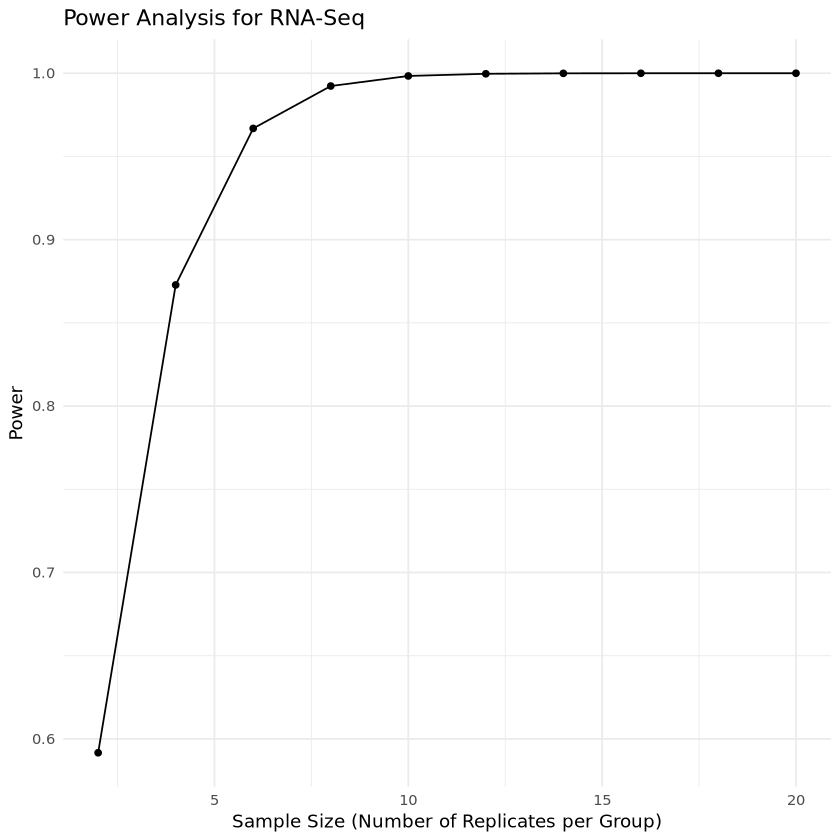

In [ ]:
# Load necessary libraries
library(RNASeqPower)
library(ggplot2)

# Define parameters for the power analysis
fc <- 2  # Fold change threshold for differential expression
alpha <- 0.05  # Desired significance level
dispersion <- 0.1  # Dispersion parameter (typical for RNA-seq)
depth <- 10^5  # Depth of sequencing (reads per sample)

# Calculate the coefficient of variation (CV)
cv <- sqrt(dispersion)

# Print parameters to debug
cat("Parameters:\n")
cat("Fold Change:", fc, "\n")
cat("Significance Level (alpha):", alpha, "\n")
cat("Dispersion:", dispersion, "\n")
cat("Depth:", depth, "\n")
cat("Coefficient of Variation (CV):", cv, "\n")
cat("Effect Size (log2 Fold Change):", fc, "\n")

# Generate power data for different sample sizes
sample_sizes <- seq(2, 20, by = 2)
power_results <- sapply(sample_sizes, function(n) {
  rnapower(depth = depth, 
           n = n, 
           cv = cv,  # Coefficient of variation
           effect = fc,  # Log2 of the fold change
           alpha = alpha)
})

# Create a data frame for plotting
power_data <- data.frame(
  SampleSize = sample_sizes,
  Power = power_results
)

# Print power data
print(power_data)

# Plot power curves using ggplot2
ggplot(power_data, aes(x = SampleSize, y = Power)) +
  geom_line() +
  geom_point() +
  labs(title = "Power Analysis for RNA-Seq",
       x = "Sample Size (Number of Replicates per Group)",
       y = "Power") +
  theme_minimal()
